In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 32.3/235.7 GB disk)


In [ ]:
import ultralytics
print(ultralytics.__version__)


8.0.196


In [ ]:
!pip install --upgrade ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.5/877.5 kB 23.8 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [ ]:
import ultralytics
print(ultralytics.__version__)

8.0.196


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="F3yC7yGwctlSMgRNrhca")
project = rf.workspace("college-if44x").project("on-tree-mature-coconut-fruit-detection")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to On-tree-mature-coconut-fruit-detection-1 in yolov11:: 100%|██████████| 548/548 [00:00<00:00, 4954.17it/s]


In [ ]:
from ultralytics import YOLO

# Load the YOLOv11 model using the path with weights_only=True if supported
model = YOLO('/content/yolov8n.pt')  # Ensure the file path is correct and trusted


100%|██████████| 6.23M/6.23M [00:00<00:00, 109MB/s]
You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


**Custom Training**

In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data=/content/On-tree-mature-coconut-fruit-detection-1/data.yaml epochs=25 imgsz=800 plots=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 255MB/s]
Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/On-tree-mature-coconut-fruit-detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, s

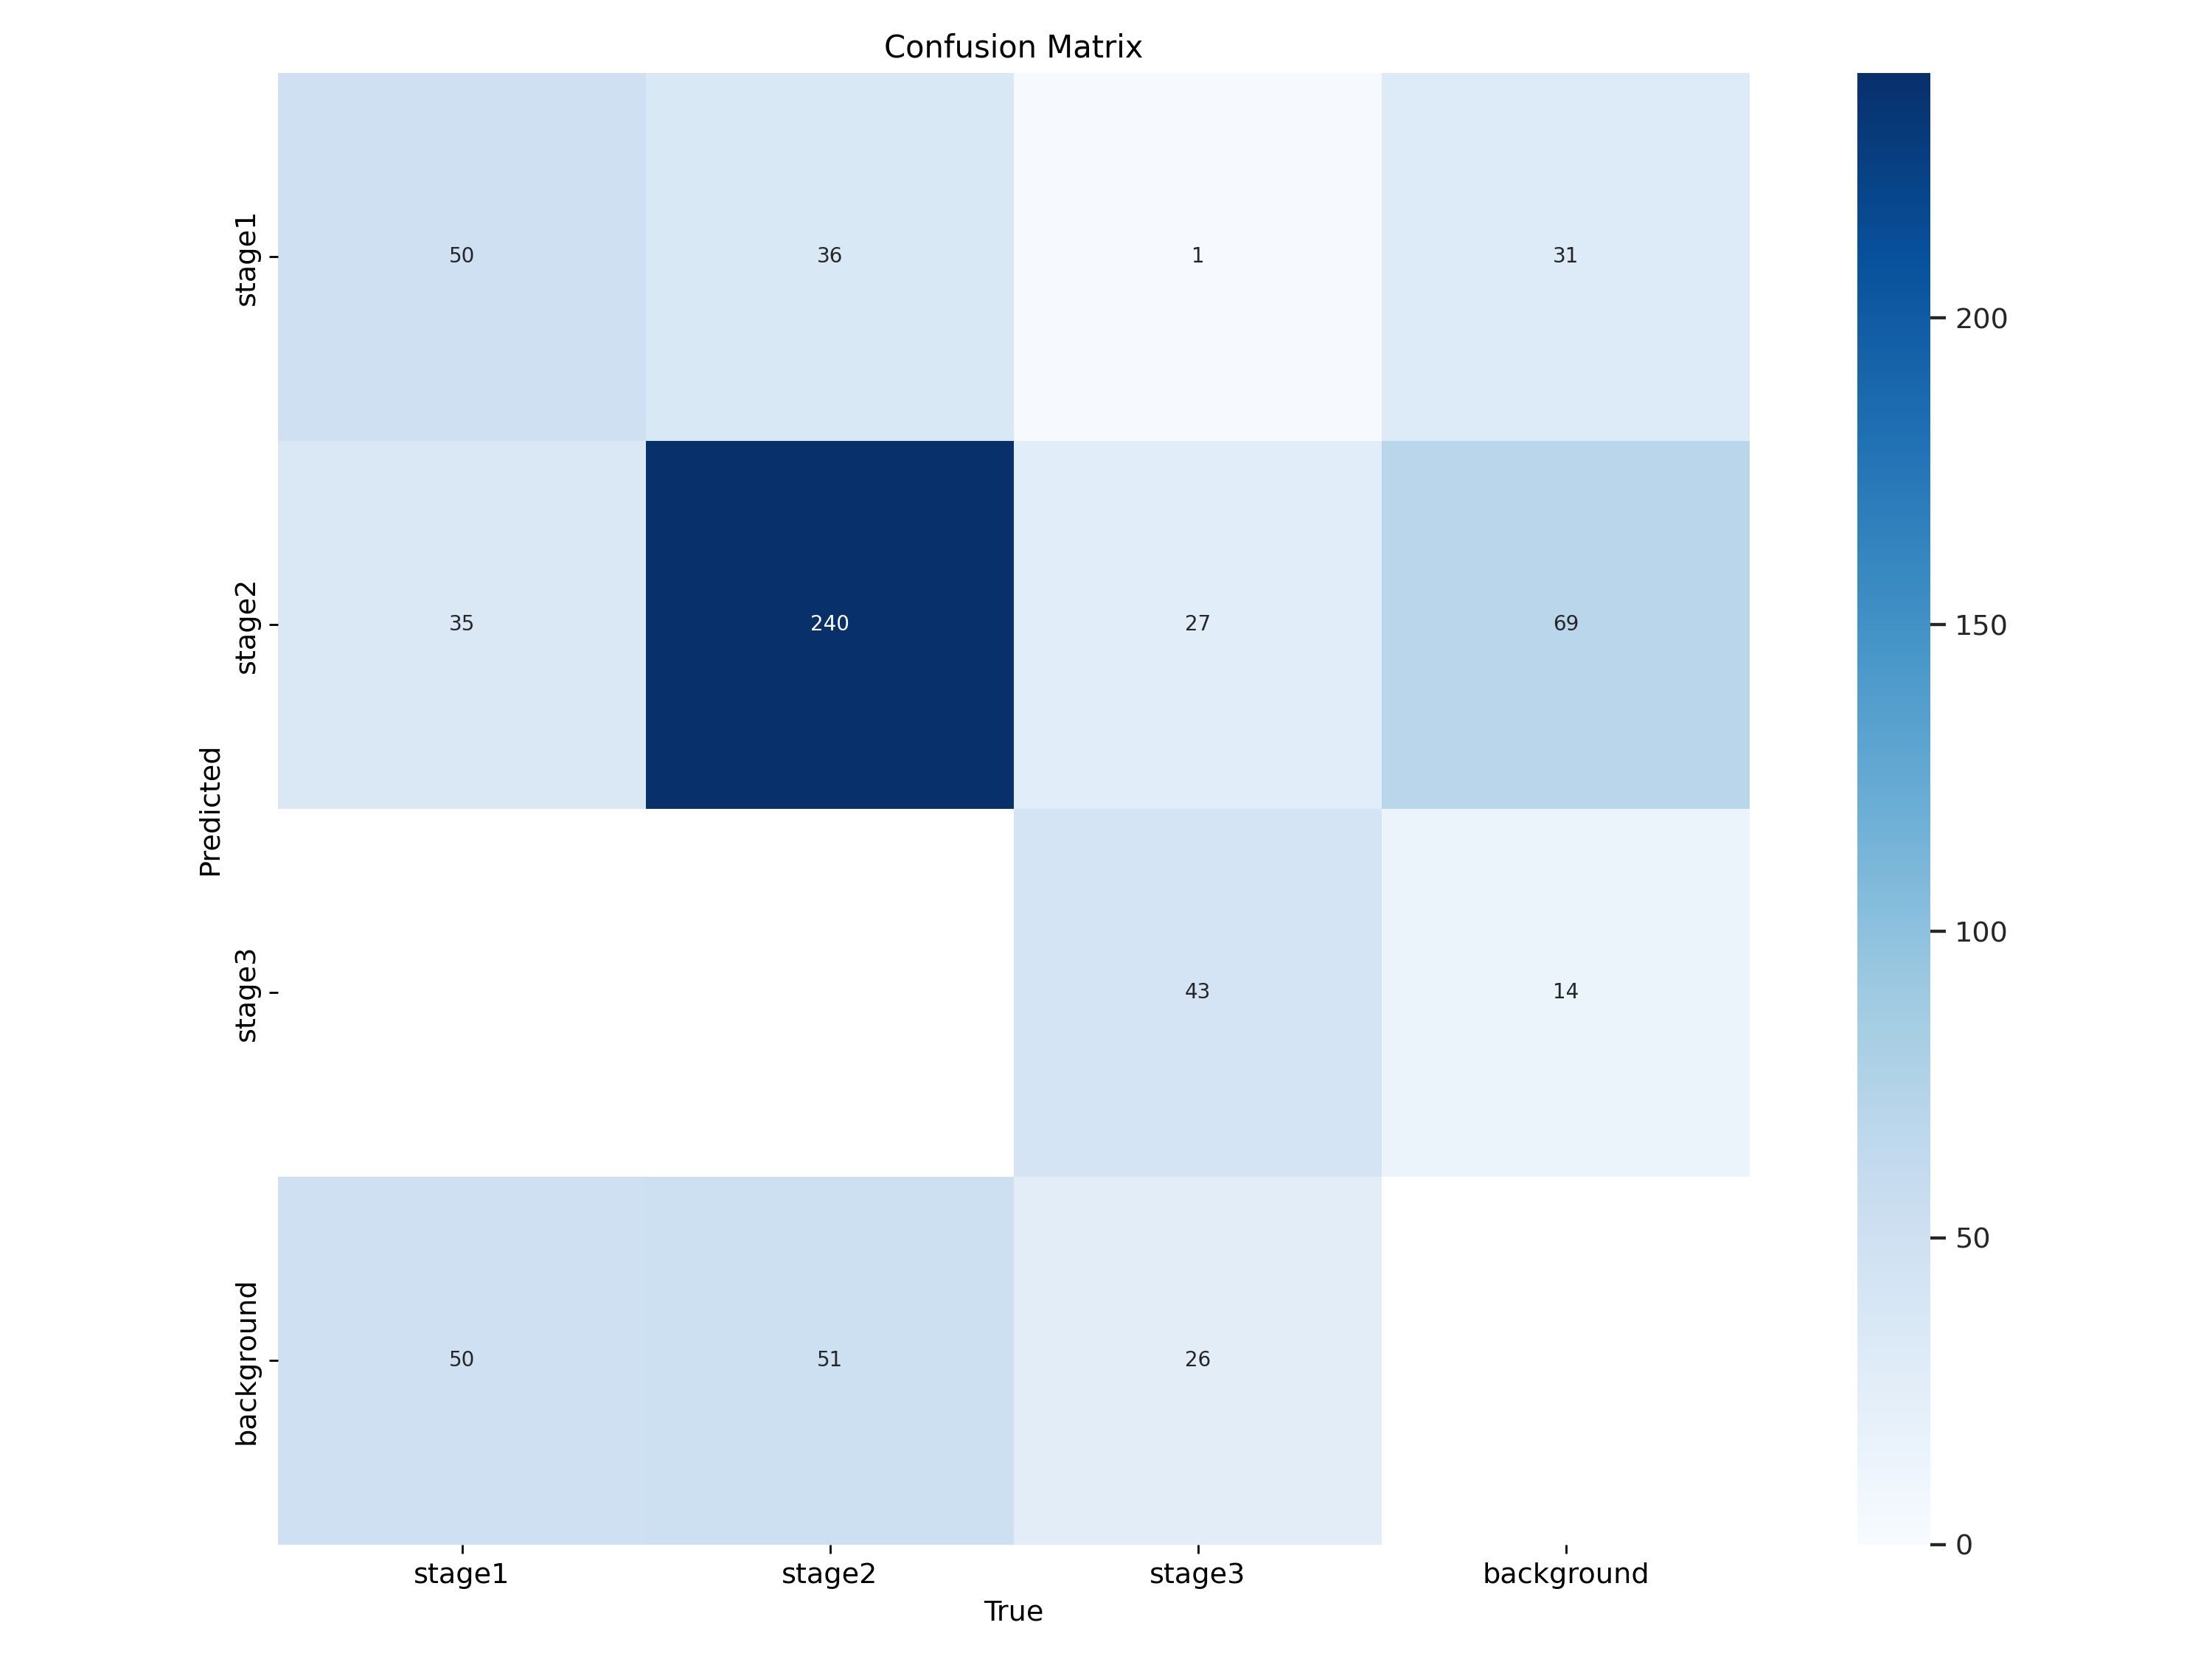

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

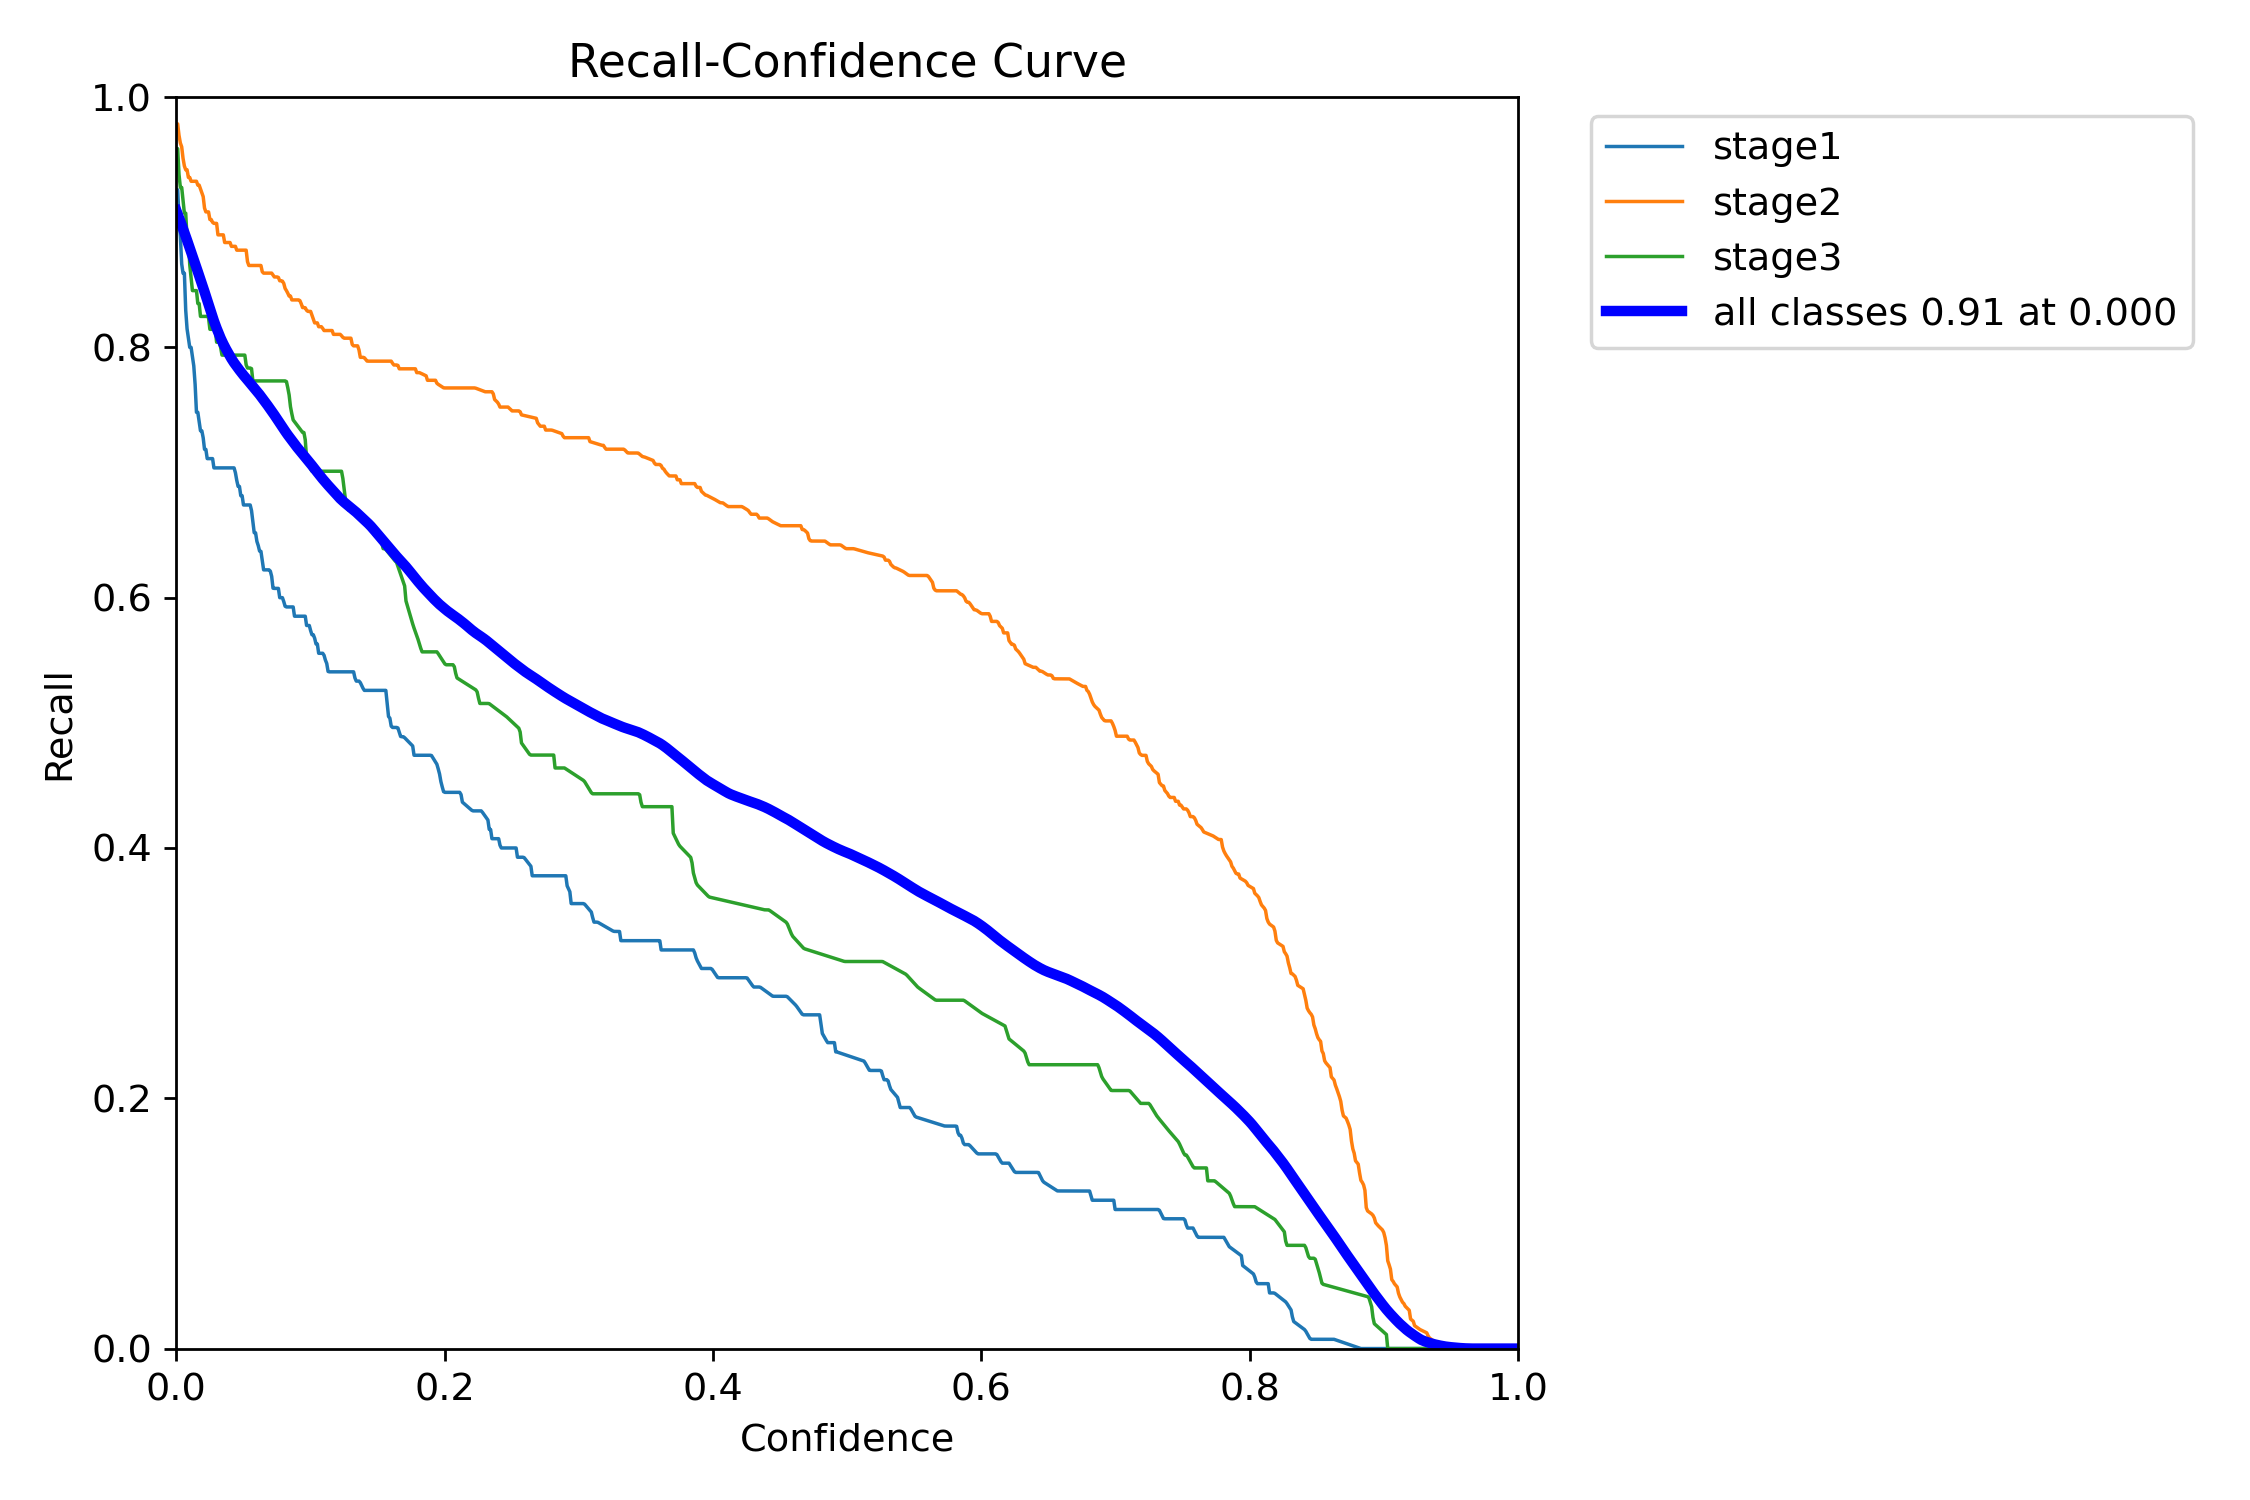

In [ ]:
Image(filename=f'/content/runs/detect/train/F1_curve.png', width=600)
Image(filename=f'/content/runs/detect/train/PR_curve.png', width=600)
Image(filename=f'/content/runs/detect/train/P_curve.png', width=600)
Image(filename=f'/content/runs/detect/train/R_curve.png', width=600)

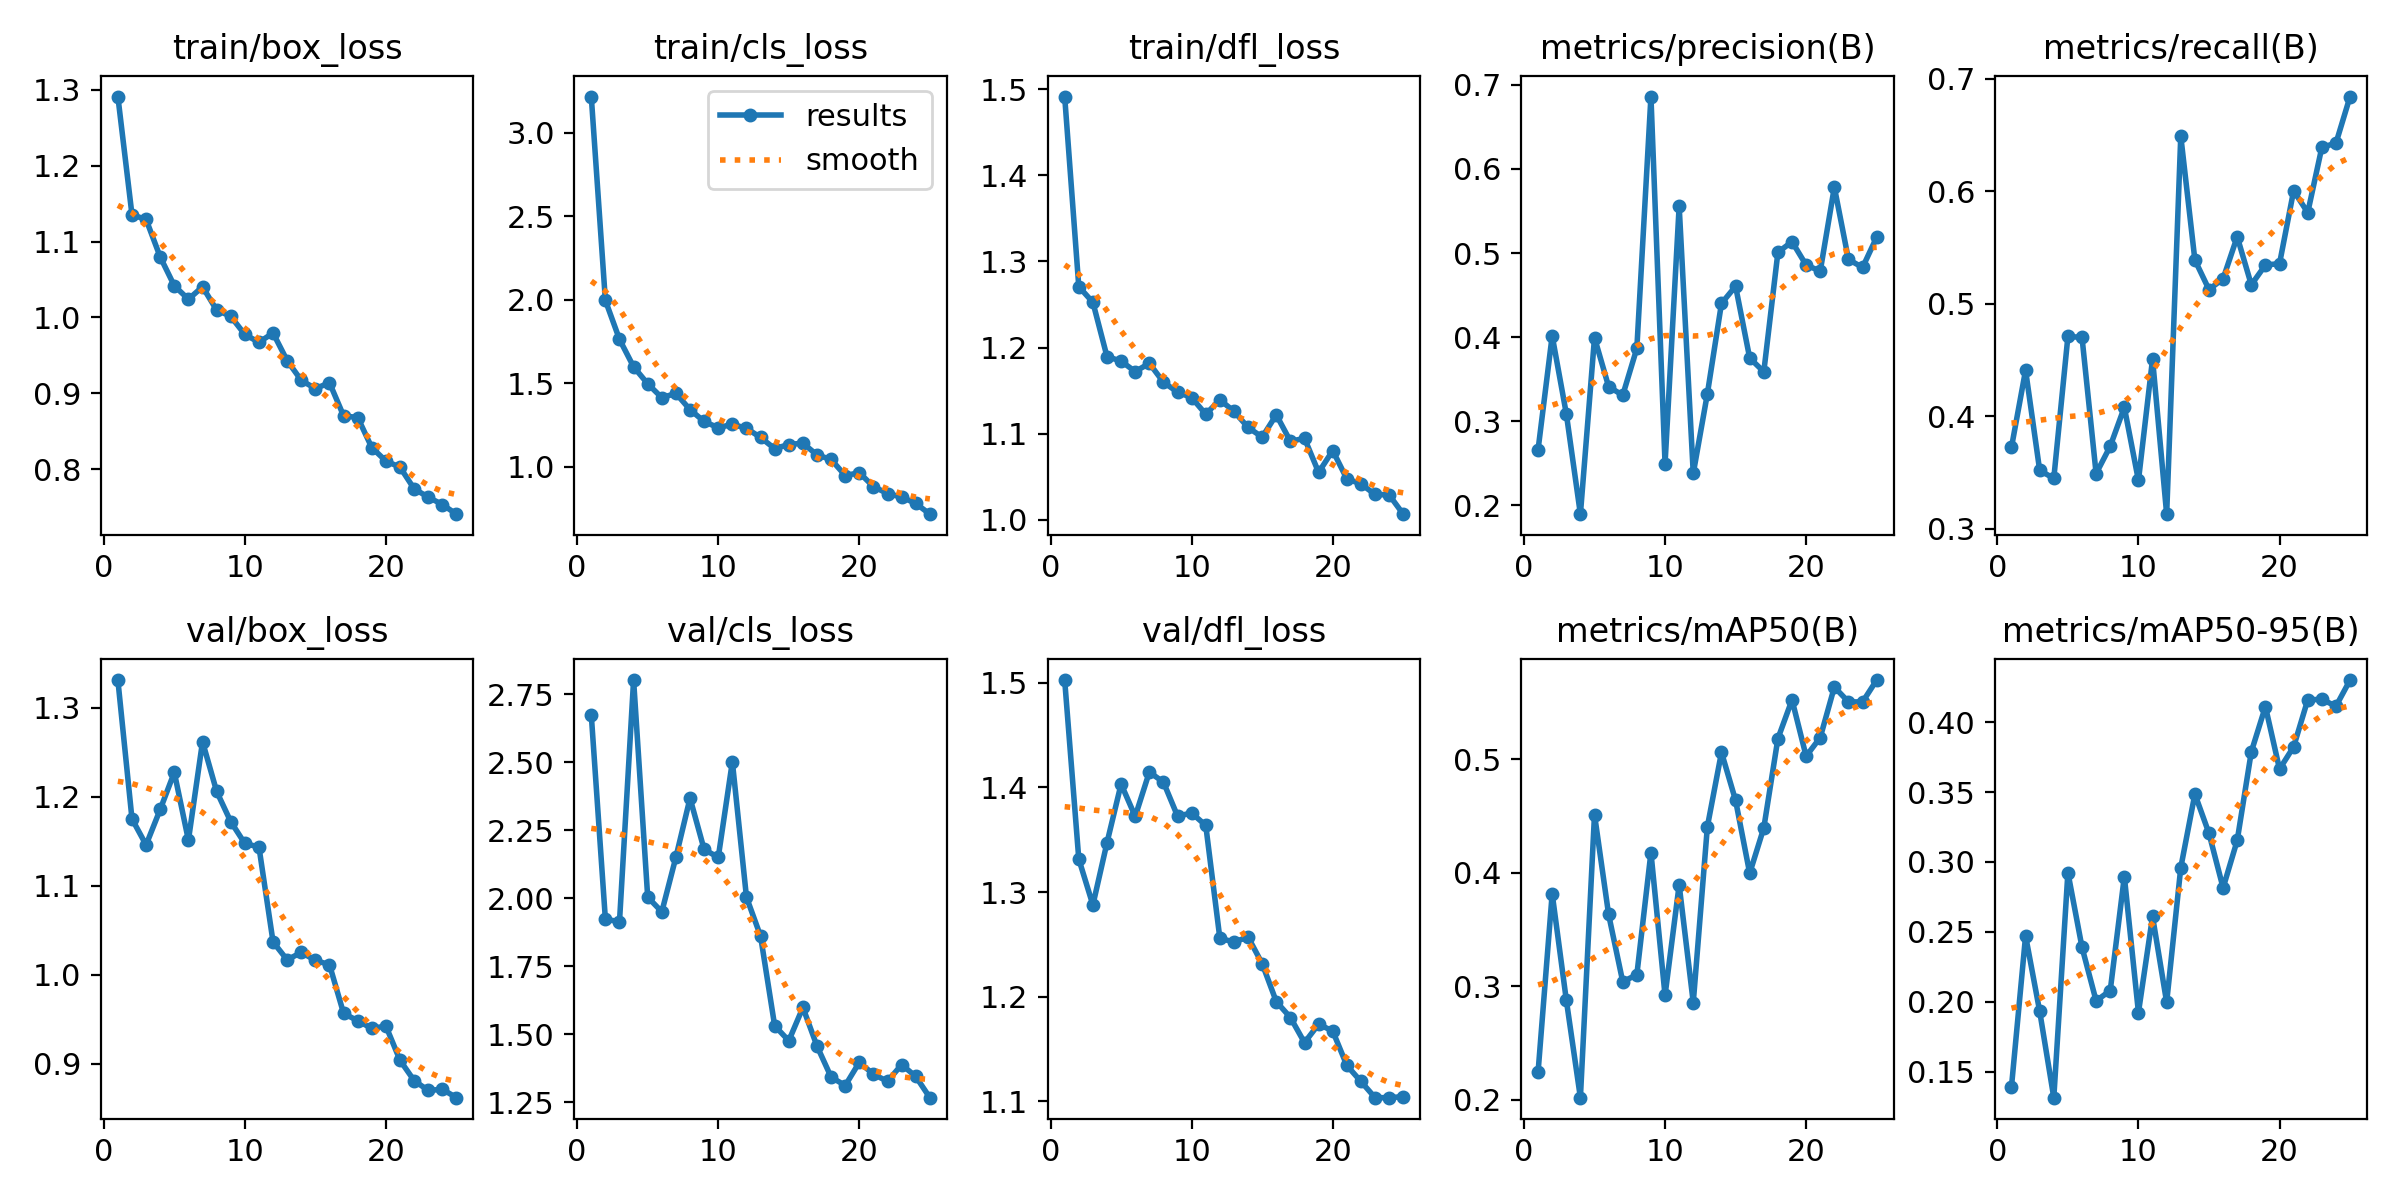

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                0.26614            0.37229           0.22448   
1                0.40159            0.44084           0.38166   
2                0.30906            0.35175           0.28812   
3                0.18943            0.34475           0.20200   
4                0.39937            0.47083           0.45134   
5                0.34120            0.46999           0.36333   
6                0.33085            0.34895           0.30419   
7                0.38660            0.37328           0.31019   
8                0.68616            0.40788           0.41788   
9                0.24941            0.34284           0.29217   
10               0.55573            0.45079           0.38937   
11               0.23789            0.31289           0.28577   
12               0.33266            0.64890           0.44062   
13               0.44013            0.53880           0.50611   
14               0.46051 

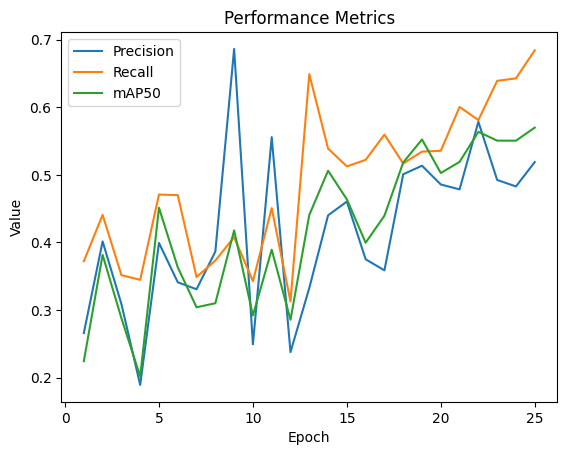

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.read_csv('/content/runs/detect/train/results.csv')

# Display the performance values
print(results_df[['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']])

# Plot some performance metrics
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision')
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall')
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Performance Metrics')
plt.legend()
plt.show()

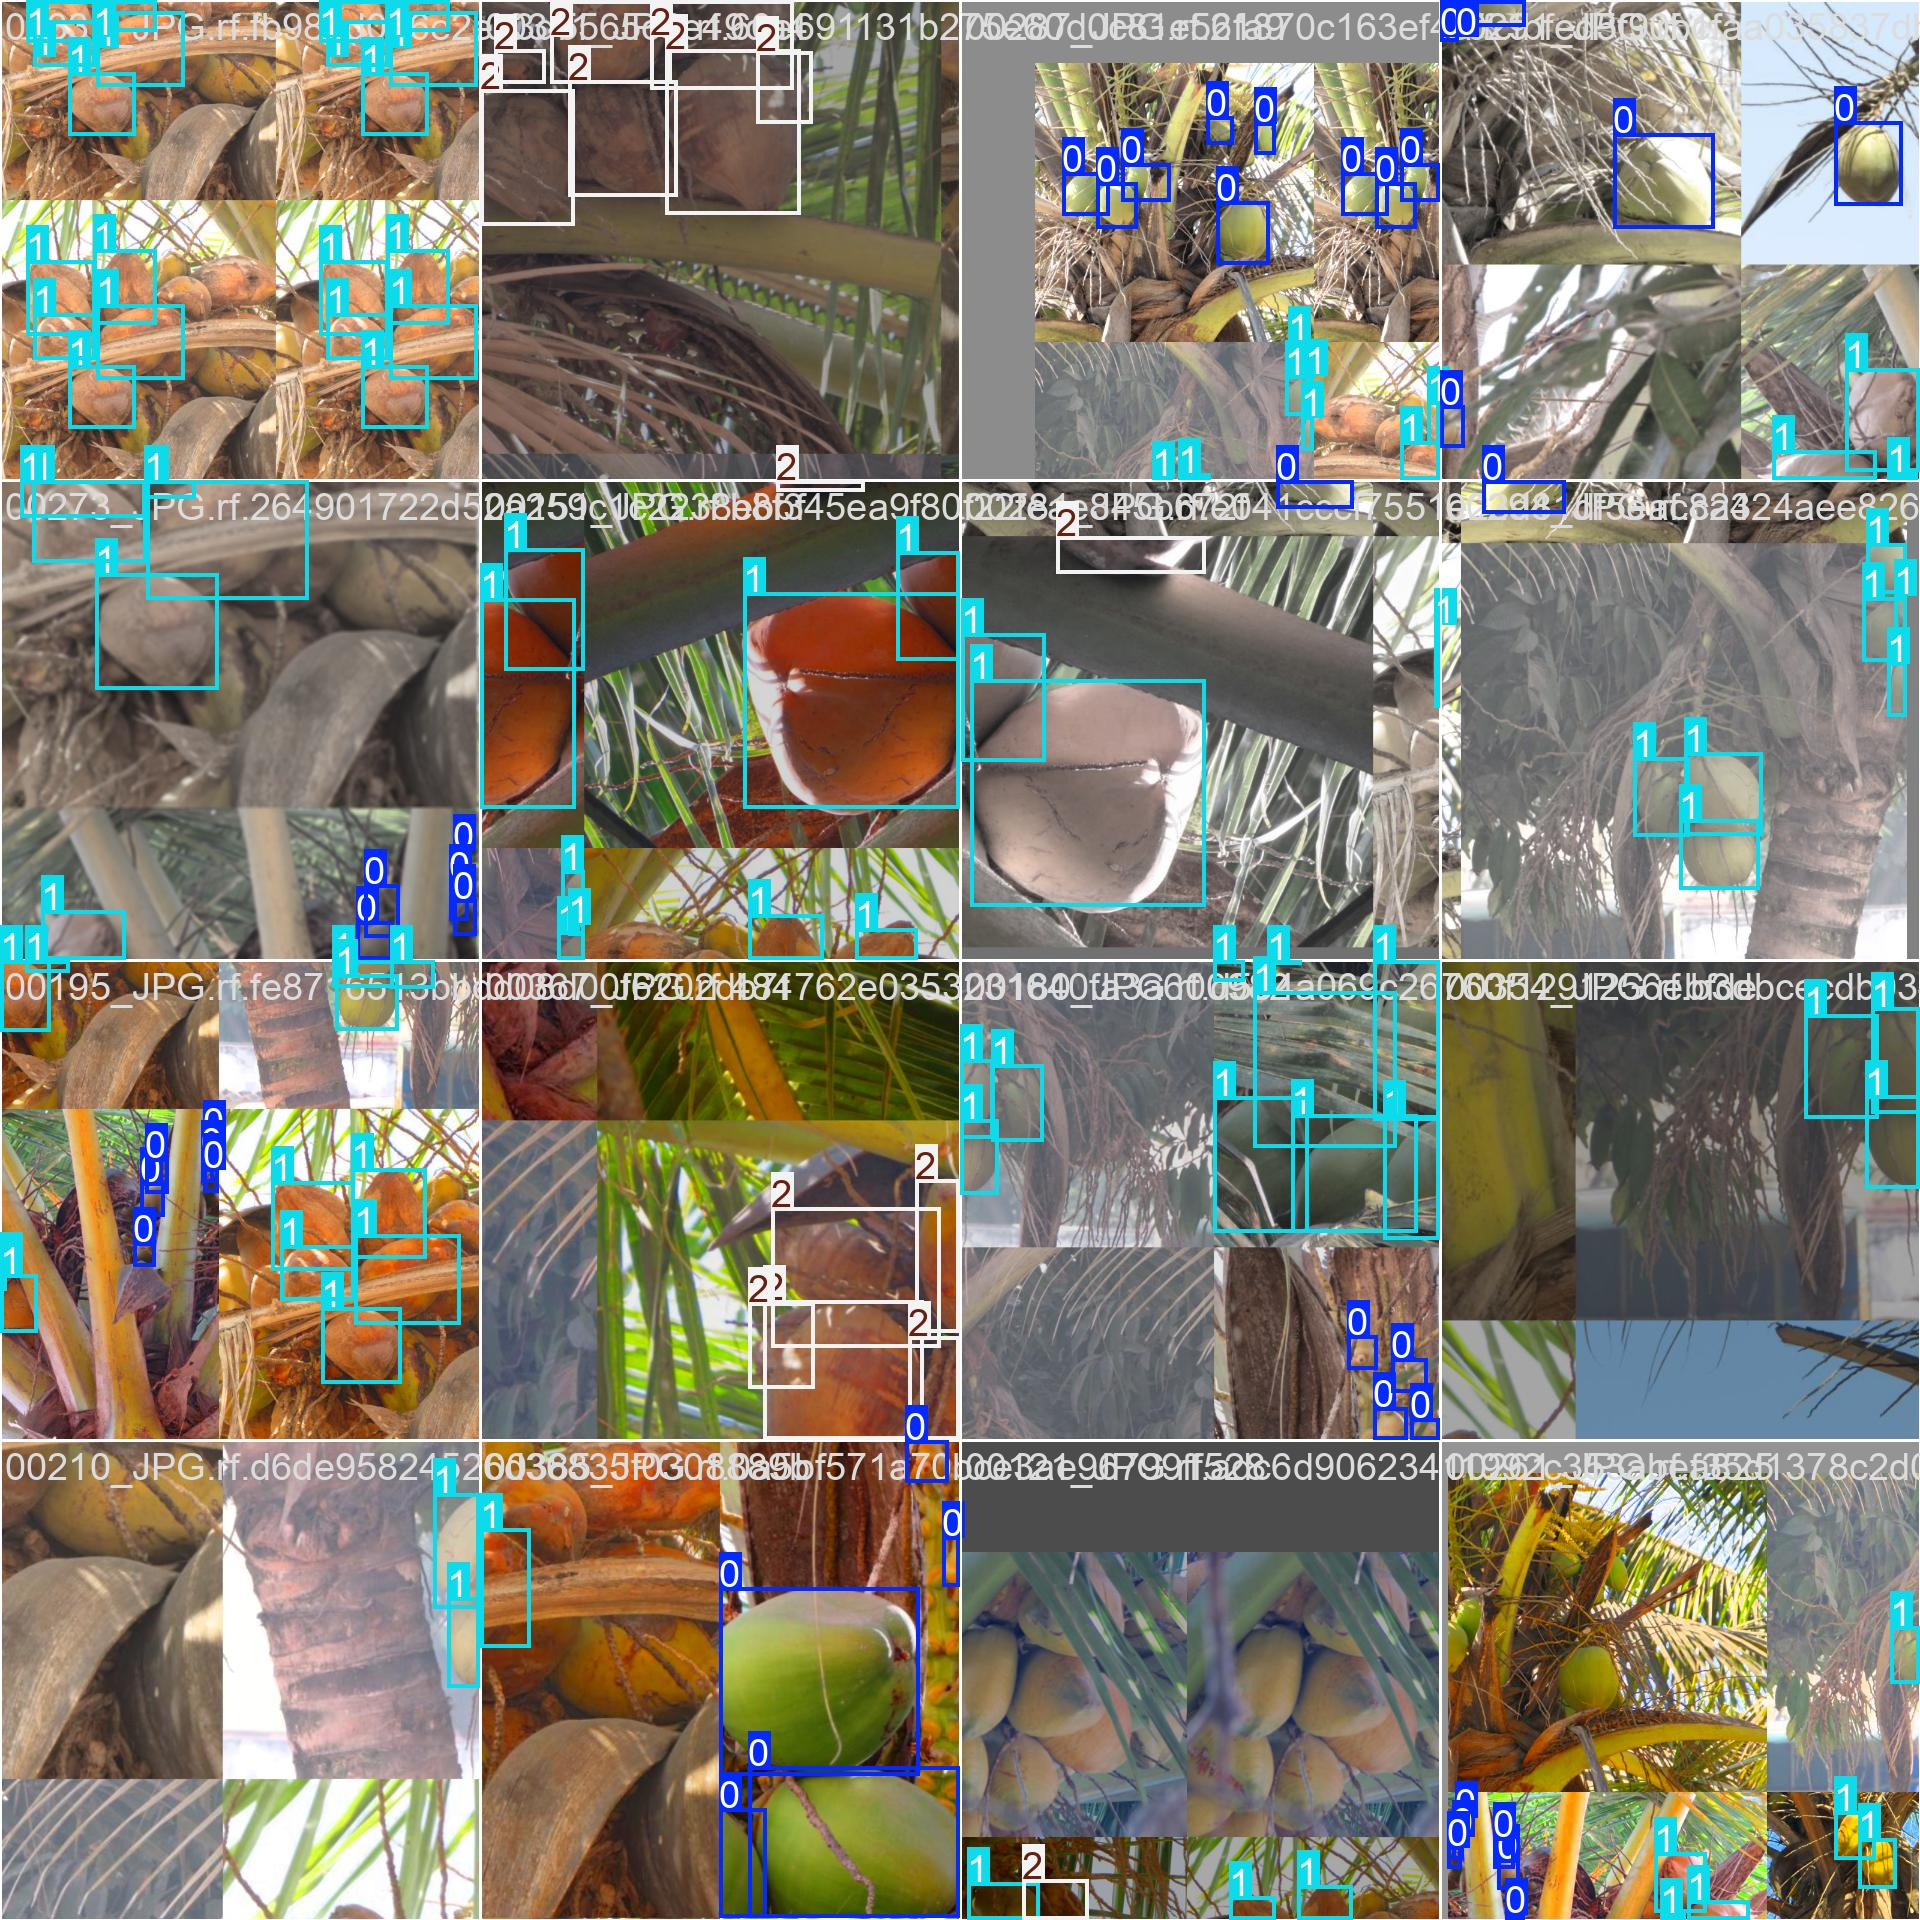

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch0.jpg', width=600)

**Validate Custom Model**

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/On-tree-mature-coconut-fruit-detection-1/data.yaml

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/On-tree-mature-coconut-fruit-detection-1/valid/labels.cache... 53 images, 2 backgrounds, 0 corrupt: 100% 53/53 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.02s/it]
                   all         53        559      0.522      0.687      0.572      0.431
                stage1         31        135      0.369      0.541      0.329      0.238
                stage2         40        327      0.535       0.81      0.756      0.599
                stage3         17         97      0.663      0.711      0.632      0.455
Speed: 5.8ms preprocess, 20.5ms inference, 0.1ms loss, 37.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Inference with Custom Model**

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/On-tree-mature-coconut-fruit-detection-1/test/images save=True

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/28 /content/On-tree-mature-coconut-fruit-detection-1/test/images/00003_jpg.rf.685ee7b127bd0896095d95bc5b656151.jpg: 800x800 6 stage2s, 11.6ms
image 2/28 /content/On-tree-mature-coconut-fruit-detection-1/test/images/00011_jpg.rf.b959217cc39f290e6ec84f3187dd4959.jpg: 800x800 8 stage2s, 10.2ms
image 3/28 /content/On-tree-mature-coconut-fruit-detection-1/test/images/00118_JPG.rf.c865049fcc80421b09821291ea49eca1.jpg: 800x800 1 stage2, 15 stage3s, 9.7ms
image 4/28 /content/On-tree-mature-coconut-fruit-detection-1/test/images/00141_JPG.rf.662e9406ebdd8691a54bbbd9799131fb.jpg: 800x800 3 stage1s, 2 stage2s, 9.4ms
image 5/28 /content/On-tree-mature-coconut-fruit-detection-1/test/images/00147_JPG.rf.031898d565a1d103eb5e253d77e202da.jpg: 800x800 8 stage3s, 9.3ms
image 6/28 /content/On-tree-mature-coconut-fruit-detection-1/te

In [ ]:
!pip install cv

In [ ]:
import cv2
import numpy as np

def count_coconuts_in_image(image_path):
# Load the image using OpenCV
  img = cv2.imread(image_path)

  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply Gaussian blur to reduce noise
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)

  # Perform Canny edge detection to find edges in the image
  edges = cv2.Canny(blurred, 50, 150)

  # Find contours in the edge-detected image
  contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Initialize the count of coconuts
  coconut_count = 0

  # Loop through the detected contours
  for contour in contours:
    # Approximate the contour with a polygon
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)

    # Check if the contour is roughly circular (indicating a coconut)
    if len(approx) >= 6 and cv2.contourArea(contour) > 100:
      coconut_count += 1

  return coconut_count


# Example usage
image_path = '/content/runs/detect/predict/00196_JPG.rf.4a2ad7568e92ff8d1260ab68074f3037.jpg'  # Replace with your image path
coconut_count = count_coconuts_in_image(image_path)
print("Number of coconuts detected:", coconut_count)

Number of coconuts detected: 16


In [ ]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=5733a7504ccafdadce8234e768ef0db7acef561da0e8a09f724ade01aa2a1e8c
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


**Kalman Filter for Fruit Tracking**

In [ ]:
def track_coconuts_with_kalman(video_path, model_path):
  cap = cv2.VideoCapture(video_path)
  if not cap.isOpened():
    print("Error opening video file")
    return

  # Load the YOLO model here using the provided path
  model = YOLO(model_path)

  # Initialize Kalman filter for each detected object
  track_ids = {}
  kalman_filters = {}

  while True:
    ret, frame = cap.read()
    if not ret:
      break

    results = model(frame, classes=[0])  # Assuming coconut is class 0
    detections = []
    for r in results:
      for box in r.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        conf = box.conf[0].item()
        detections.append([x1, y1, x2, y2, conf])



**Hungarian Algorithm for Optimal Assignment**

In [ ]:
def track_coconuts_with_kalman(video_path, model_path):
  cap = cv2.VideoCapture(video_path)
  if not cap.isOpened():
    print("Error opening video file")
    return

  # Load the YOLO model here using the provided path
  model = YOLO('/content/runs/detect/train/weights/best.pt')

  # Initialize Kalman filter for each detected object
  track_ids = {}
  kalman_filters = {}

  while True:
    ret, frame = cap.read()
    if not ret:
      break

    results = model(frame, classes=[0])  # Assuming coconut is class 0
    detections = []
    for r in results:
      for box in r.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        conf = box.conf[0].item()
        detections.append([x1, y1, x2, y2, conf])

    # Perform Hungarian Algorithm for data association
    if detections:
      current_track_ids = list(track_ids.keys())
      cost_matrix = np.zeros((len(detections), len(current_track_ids)))
      for i, det in enumerate(detections):
        for j, track_id in enumerate(current_track_ids):
          kf = kalman_filters[track_id]
          predicted_bbox = kf.predict()
          iou = calculate_iou(det[:4], predicted_bbox[:4])
          cost_matrix[i, j] = 1 - iou  # Higher cost for lower IOU

      row_ind, col_ind = linear_sum_assignment(cost_matrix)

      # Update Kalman filters and track IDs
      for i, j in zip(row_ind, col_ind):
        if cost_matrix[i, j] < 0.5:  # Threshold for association
          kf = kalman_filters[current_track_ids[j]]
          kf.update(detections[i][:4])
          track_ids[current_track_ids[j]] = detections[i]
        else:
          # Create new track ID and Kalman filter for unassigned detection
          new_track_id = max(track_ids.keys() or [0]) + 1
          kf = create_kalman_filter(detections[i][:4])
          track_ids[new_track_id] = detections[i]
          kalman_filters[new_track_id] = kf

      # Delete tracks that are no longer detected
      for track_id in list(track_ids.keys()):
        if track_id not in [current_track_ids[j] for j in col_ind]:
          del track_ids[track_id]
          del kalman_filters[track_id]

    # Visualize the tracking results on the frame
    for track_id, detection in track_ids.items():
      x1, y1, x2, y2, _ = detection
      cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0))

**final visualization**

In [ ]:
!pip install -U ultralytics

In [ ]:
import cv2
import numpy as np
from scipy.optimize import linear_sum_assignment
from filterpy.kalman import KalmanFilter
from ultralytics import YOLO

In [ ]:
def calculate_iou(bbox1, bbox2):
  # Calculate Intersection over Union (IOU) between two bounding boxes
  x1_inter = max(bbox1[0], bbox2[0])
  y1_inter = max(bbox1[1], bbox2[1])
  x2_inter = min(bbox1[2], bbox2[2])
  y2_inter = min(bbox1[3], bbox2[3])

  if x1_inter < x2_inter and y1_inter < y2_inter:
    intersection_area = (x2_inter - x1_inter) * (y2_inter - y1_inter)
    bbox1_area = (bbox1[2] - bbox1[0]) * (bbox1[3] - bbox1[1])
    bbox2_area = (bbox2[2] - bbox2[0]) * (bbox2[3] - bbox2[1])
    union_area = bbox1_area + bbox2_area - intersection_area
    iou = intersection_area / union_area
  else:
    iou = 0

  return iou

def create_kalman_filter(bbox):
  # Initialize a Kalman filter for object tracking
  kf = KalmanFilter(dim_x=7, dim_z=4)  # x, y, width, height
  kf.F = np.array([[1, 0, 1, 0, 0.5, 0, 0],
                   [0, 1, 0, 1, 0, 0.5, 0],
                   [0, 0, 1, 0, 1, 0, 0],
                   [0, 0, 0, 1, 0, 1, 0],
                   [0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0, 1]])
  kf.H = np.array([[1, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0]])
  kf.x = np.array([bbox[0], bbox[1], 0, 0, 0, 0, 0])  # Initial state
  kf.P *= 1000.  # Covariance matrix
  kf.R *= 1.  # Measurement noise
  kf.Q *= 0.01  # Process noise
  return kf


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/istockphoto-2148259668-640_adpp_is.mp4 save=True

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

video 1/1 (frame 1/1094) /content/istockphoto-2148259668-640_adpp_is.mp4: 480x800 1 stage2, 76.1ms
video 1/1 (frame 2/1094) /content/istockphoto-2148259668-640_adpp_is.mp4: 480x800 1 stage2, 10.3ms
video 1/1 (frame 3/1094) /content/istockphoto-2148259668-640_adpp_is.mp4: 480x800 1 stage2, 9.4ms
video 1/1 (frame 4/1094) /content/istockphoto-2148259668-640_adpp_is.mp4: 480x800 2 stage2s, 10.1ms
video 1/1 (frame 5/1094) /content/istockphoto-2148259668-640_adpp_is.mp4: 480x800 1 stage2, 9.2ms
video 1/1 (frame 6/1094) /content/istockphoto-2148259668-640_adpp_is.mp4: 480x800 1 stage2, 9.3ms
video 1/1 (frame 7/1094) /content/istockphoto-2148259668-640_adpp_is.mp4: 480x800 1 stage2, 9.3ms
video 1/1 (frame 8/1094) /content/istockphoto-2148259668-640_adpp_is.mp4: 480x800 1 stage2, 9.2ms
video 1/1 (frame 9/1094) /content/istockphot

**Evaluation metrics**

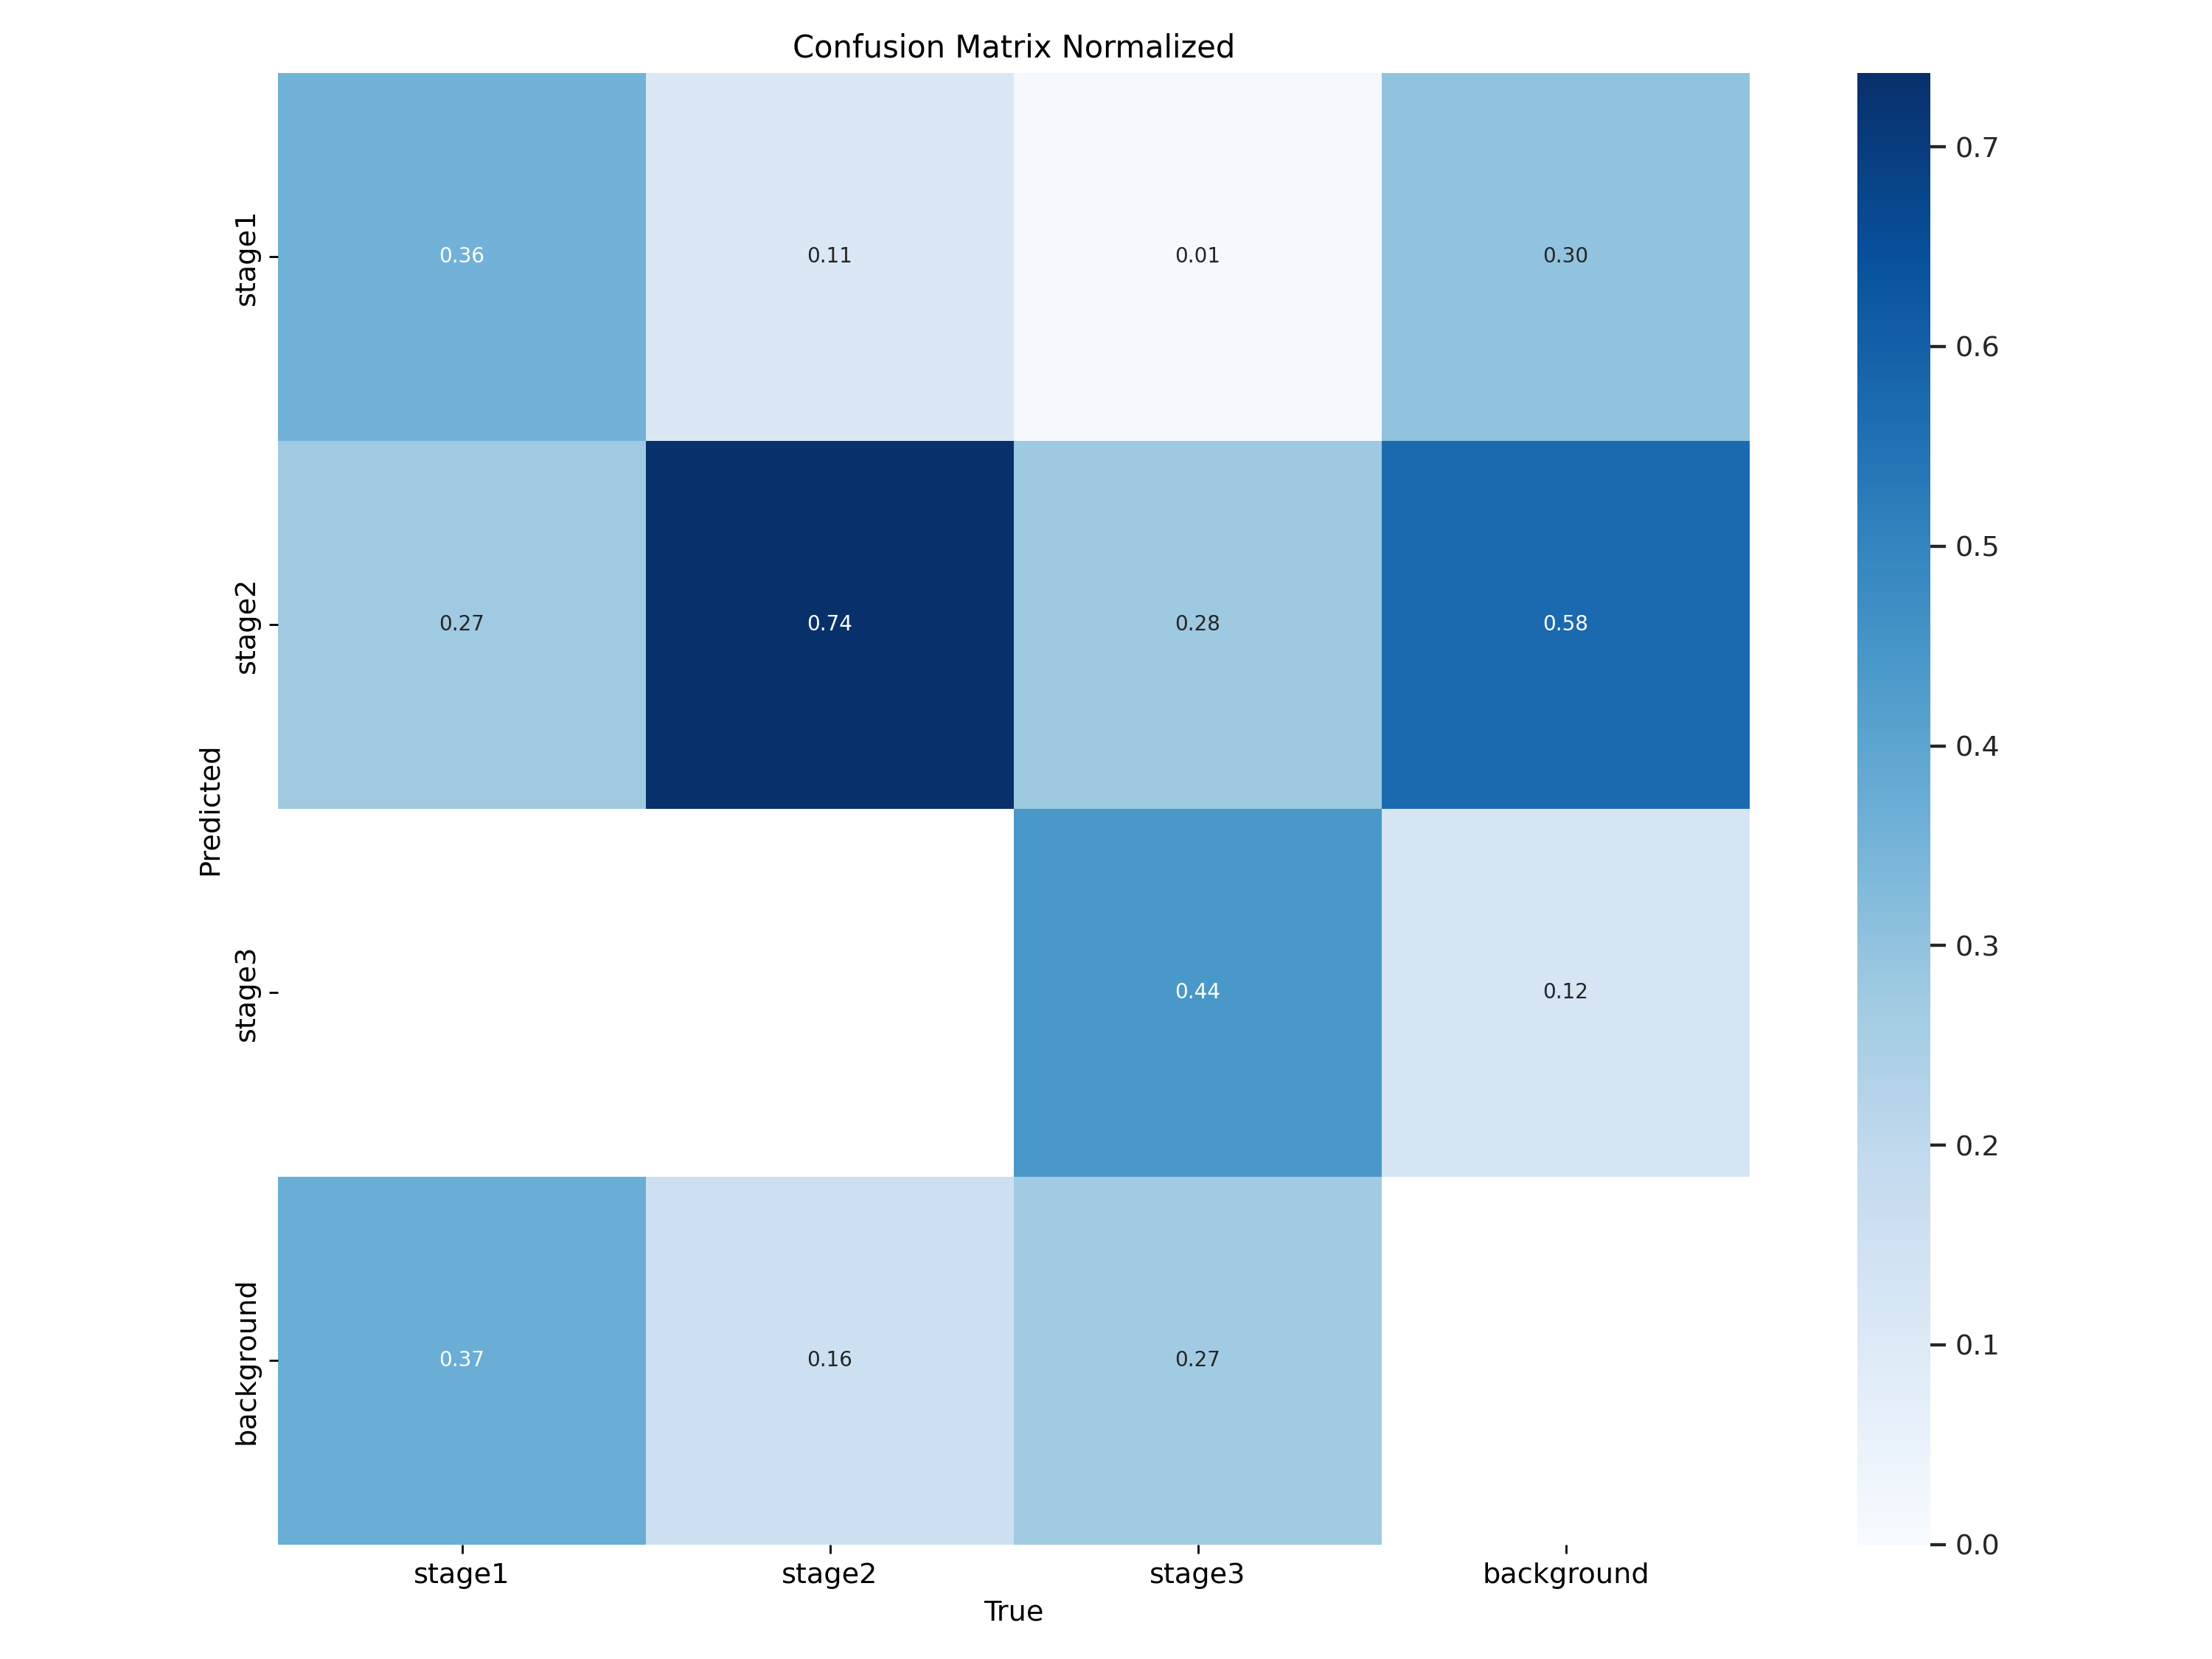

In [ ]:
Image(filename=f'/content/runs/detect/val/confusion_matrix_normalized.png', width=600)

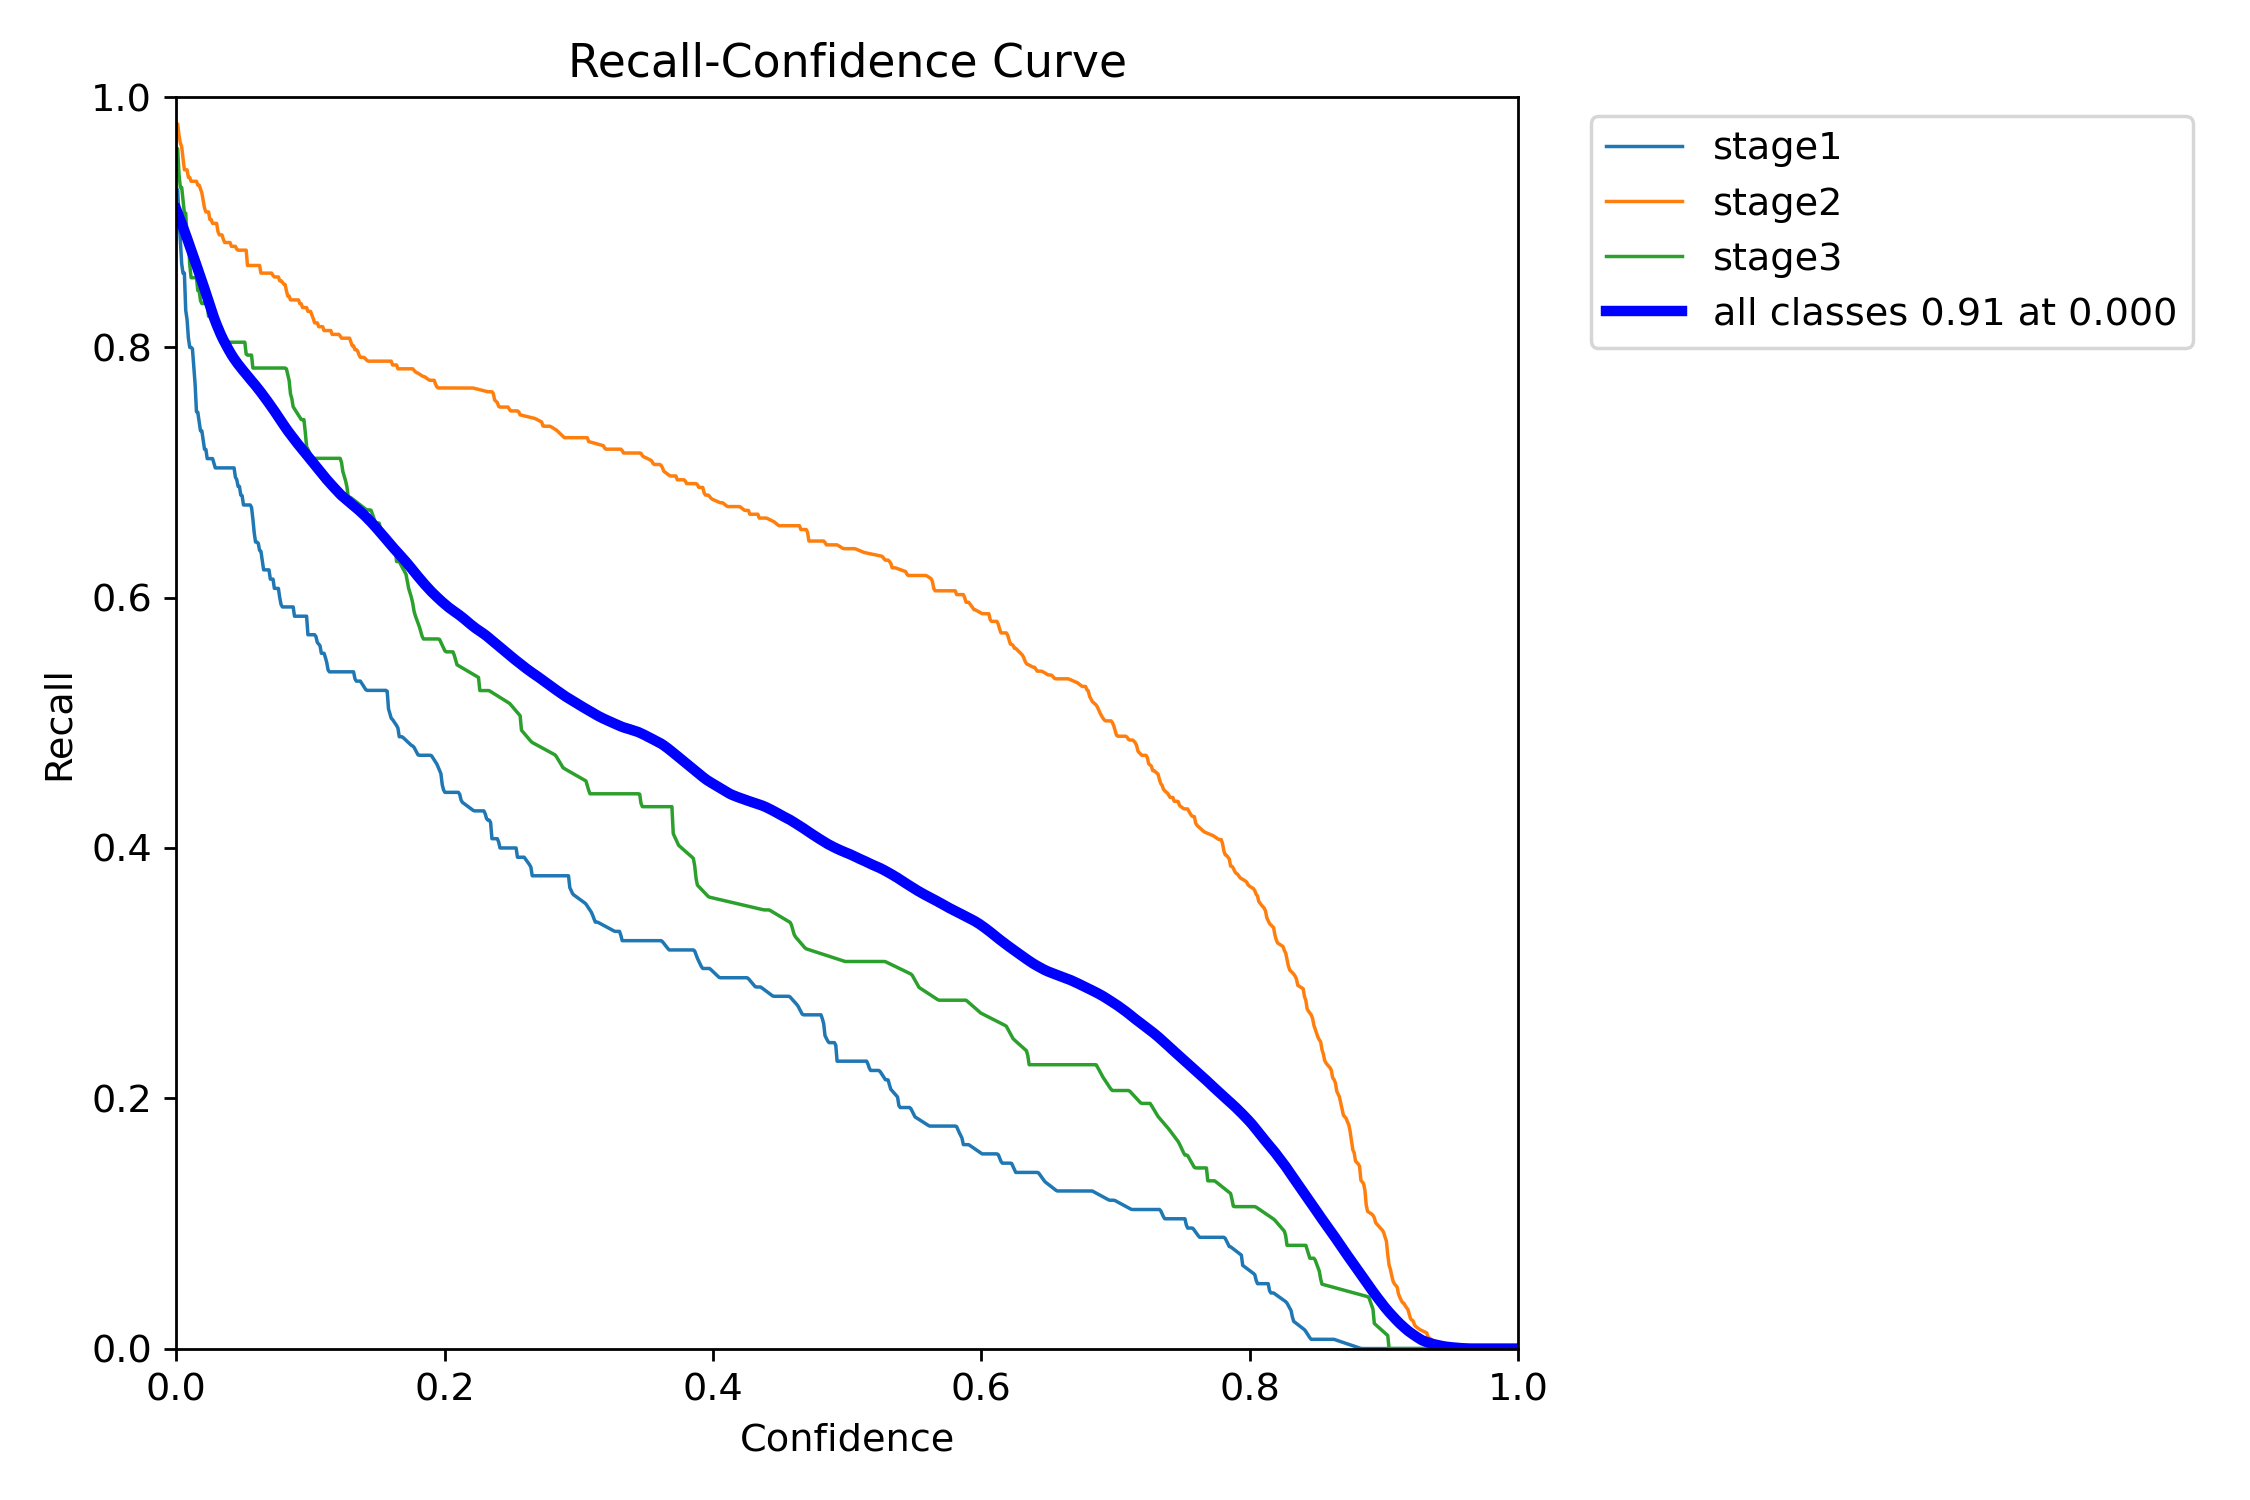

In [ ]:
Image(filename=f'/content/runs/detect/val/F1_curve.png', width=600)
Image(filename=f'/content/runs/detect/val/PR_curve.png', width=600)
Image(filename=f'/content/runs/detect/val/P_curve.png', width=600)
Image(filename=f'/content/runs/detect/val/R_curve.png', width=600)

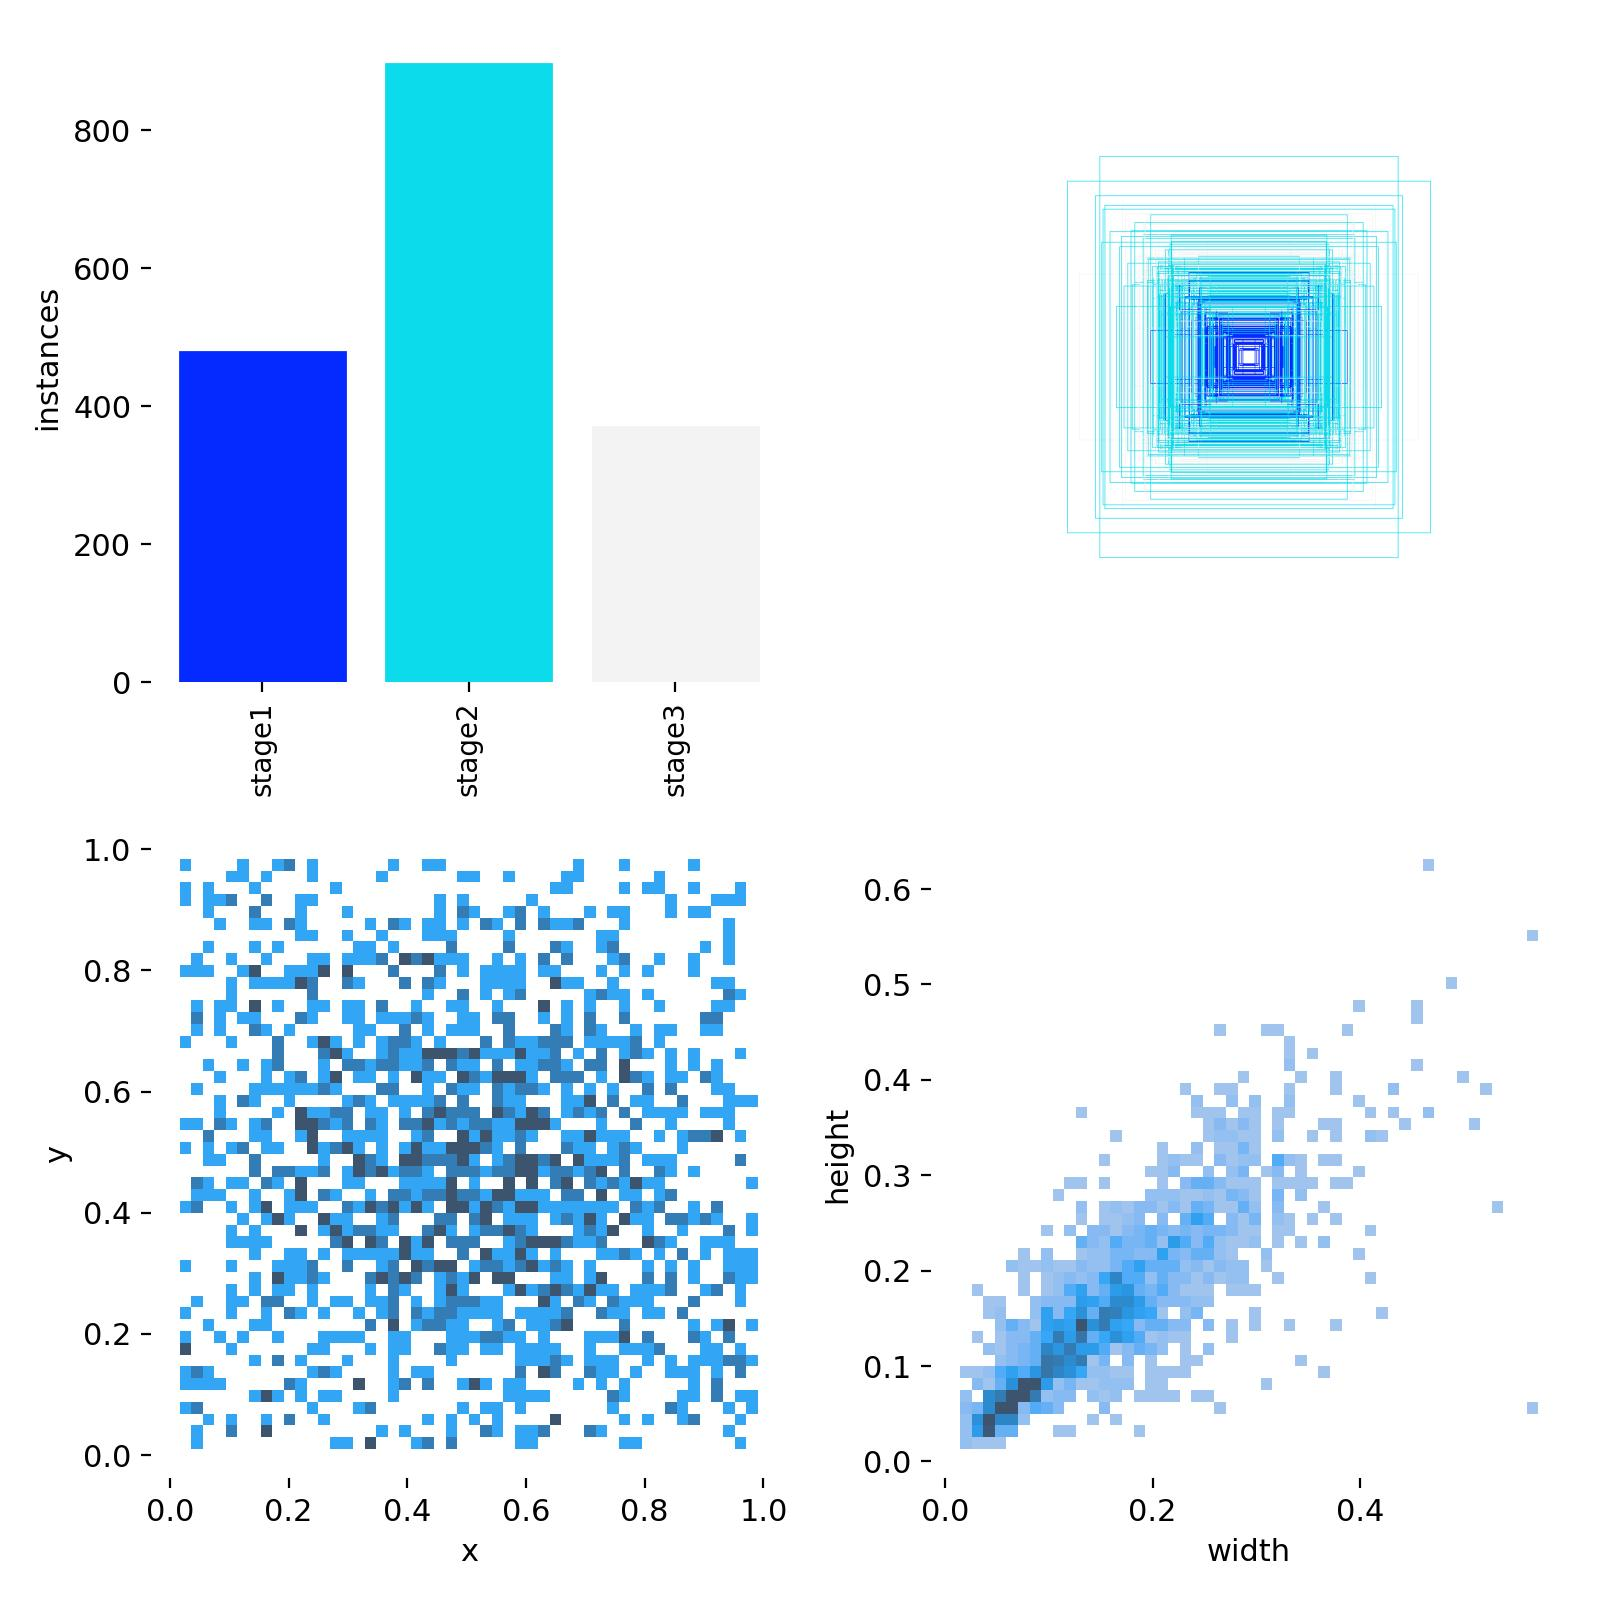

In [ ]:
Image(filename=f'/content/runs/detect/train/labels.jpg',width=600)